### This consists of the code for the DistilBERT model training

In [1]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Import STOPWORDS from NLTK
from nltk.corpus import stopwords

import string, re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [3]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00
time: 414 µs (started: 2023-04-23 14:28:14 +00:00)


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

time: 848 ms (started: 2023-04-23 14:28:14 +00:00)


In [6]:
train_df = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/train_df.csv?token=GHSAT0AAAAAACADFJF5O7BRDE6QSFWABXCSZCFJ5MQ')
val_df = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/val_df.csv?token=GHSAT0AAAAAACADFJF5YUSB4B25Y77EPYUGZCFJ5UA')
test_df = pd.read_csv('https://raw.githubusercontent.com/VarshithaCVasireddy/datasets/main/test_df.csv?token=GHSAT0AAAAAACADFJF455F5MGZYXAAOBGEKZCFJ4YA')

time: 1.32 s (started: 2023-04-23 14:32:11 +00:00)


In [7]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.1 MB/s eta 0:00:00
time: 10.8 s (started: 2023-04-23 14:32:17 +00:00)


In [8]:
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, Trainer, TrainingArguments

time: 7.58 s (started: 2023-04-23 14:32:28 +00:00)


In [9]:
# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

time: 957 ms (started: 2023-04-23 14:32:36 +00:00)


In [10]:
# Encode the training, validation, and test sets
train_encodings = tokenizer(train_df['str1'].tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_df['str1'].tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_df['str1'].tolist(), truncation=True, padding=True)

# Convert 'Label' column to numeric labels
label_map = {'Fake': 0, 'Real': 1}
train_labels = [label_map[label] for label in train_df['label'].tolist()]
val_labels = [label_map[label] for label in val_df['label'].tolist()]
test_labels = [label_map[label] for label in test_df['label'].tolist()]


time: 12.2 s (started: 2023-04-23 14:32:37 +00:00)


In [11]:
# Create PyTorch datasets
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_labels)
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_labels)
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(test_labels)
)

time: 830 ms (started: 2023-04-23 14:32:49 +00:00)


In [12]:
# Load the DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

time: 5.81 s (started: 2023-04-23 14:32:50 +00:00)


In [13]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=50,
    learning_rate=5e-5,
)

time: 97.3 ms (started: 2023-04-23 14:32:56 +00:00)


In [14]:
# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=lambda data: {'input_ids': torch.stack([item[0] for item in data]),
                                'attention_mask': torch.stack([item[1] for item in data]),
                                'labels': torch.stack([item[2] for item in data])},
)

time: 9.91 s (started: 2023-04-23 14:33:07 +00:00)


In [15]:
# Train the model
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss
50,0.664500,0.646246
100,0.401900,0.340077
150,0.280900,0.244478
200,0.212800,0.269263
250,0.199300,0.184895
300,0.279400,0.176797
350,0.268000,0.201851
400,0.222000,0.163502
450,0.262900,0.216651
500,0.199800,0.143712


TrainOutput(global_step=5082, training_loss=0.09987941842976282, metrics={'train_runtime': 1171.6837, 'train_samples_per_second': 69.38, 'train_steps_per_second': 4.337, 'total_flos': 862313866152228.0, 'train_loss': 0.09987941842976282, 'epoch': 3.0})

time: 19min 31s (started: 2023-04-23 14:33:17 +00:00)


In [16]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 22.8 MB/s eta 0:00:00
time: 10.5 s (started: 2023-04-23 14:52:48 +00:00)


In [17]:
!pip install evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
time: 10.3 s (started: 2023-04-23 14:52:59 +00:00)


In [19]:
from sklearn.metrics import accuracy_score, classification_report

label_map = {'Fake': 0, 'Real': 1}
# Evaluate the model on the test set
preds = trainer.predict(test_dataset)
pred_labels = preds.predictions.argmax(-1)

# Convert the true labels to integers
true_labels = [label_map[label] for label in test_df['label'].tolist()]

# Compute the accuracy and classification report
accuracy = accuracy_score(true_labels, pred_labels)
class_report = classification_report(true_labels, pred_labels, target_names=['Fake', 'Real'])

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9648699845014638
Classification Report:
              precision    recall  f1-score   support

        Fake       0.97      0.96      0.96      2667
        Real       0.96      0.97      0.97      3140

    accuracy                           0.96      5807
   macro avg       0.97      0.96      0.96      5807
weighted avg       0.96      0.96      0.96      5807

time: 7.73 s (started: 2023-04-23 15:04:10 +00:00)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Compute precision, recall, and F1 score
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

# Compute confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)

# Compute ROC AUC score
roc_auc = roc_auc_score(true_labels, pred_labels)

# Print results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)
print(f"ROC AUC Score: {roc_auc}")

Precision: 0.9633838383838383
Recall: 0.9719745222929936
F1 Score: 0.9676601141407737
Confusion Matrix:
[[2551  116]
 [  88 3052]]
ROC AUC Score: 0.9642399795566956
time: 131 ms (started: 2023-04-23 15:04:36 +00:00)


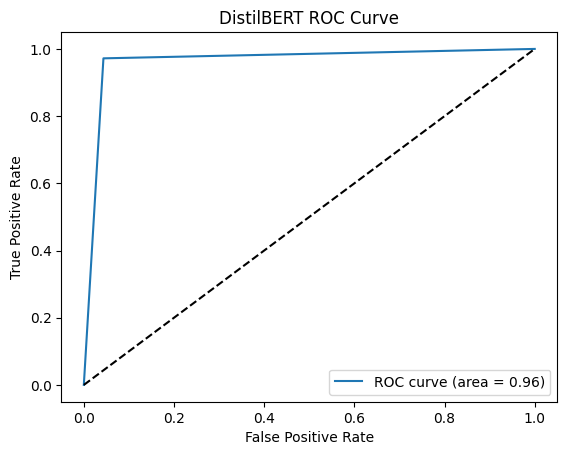

time: 597 ms (started: 2023-04-23 15:06:49 +00:00)


In [22]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DistilBERT ROC Curve')
plt.legend(loc='lower right')
plt.show()